# **FERNANDO EDWIN HIPSON**
---
## Data Science and Business Analytics Intern @ **The Sparks Foundation (GRIP July 2021)**
## Task 4: Exploratory Data Analysis(EDA) on global Terrorism

---



### Dataset Used: Global Terorrism
### Dataset available at: [Click here](https://drive.google.com/file/d/1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_/view)

## Importing required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##Loading the dataset

In [ ]:
data_frame = pd.read_csv('/content/drive/MyDrive/The Sparks Foundation/terorrism.csv', encoding='latin1')
data_frame.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Printing all the columns

In [ ]:
data_frame.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

## Printing Column wise info for the data frame to take further decisions

In [ ]:
data_frame.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   eventid             181691 non-null  int64  
 1   iyear               181691 non-null  int64  
 2   imonth              181691 non-null  int64  
 3   iday                181691 non-null  int64  
 4   approxdate          9239 non-null    object 
 5   extended            181691 non-null  int64  
 6   resolution          2220 non-null    object 
 7   country             181691 non-null  int64  
 8   country_txt         181691 non-null  object 
 9   region              181691 non-null  int64  
 10  region_txt          181691 non-null  object 
 11  provstate           181270 non-null  object 
 12  city                181257 non-null  object 
 13  latitude            177135 non-null  float64
 14  longitude           177134 non-null  float64
 15  specificity         181685 non-nu

## Considering Columns based on above info (eliminating some since most of their values are null) and renaming as per convenience

In [ ]:
data_frame.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City',
                           'latitude':'latitude','longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype',
                           'weaptype1_txt':'Weapon','nkill':'kill','nwound':'Wound'},inplace=True) 
#inplace allows us to save the value there i.e. updates the dataframe with required modification

In [ ]:
data_frame = data_frame[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill','Wound','target1','summary',
                         'Group','Targettype','Weapon','motive']]

In [ ]:
data_frame.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
data_frame.shape
#To get number of rows and columns

(181691, 18)

## Preprocessing the data

In [ ]:
data_frame.isna().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [ ]:
data_frame['Wound'] = data_frame['Wound'].fillna(0)
data_frame['kill'] = data_frame['kill'].fillna(0)

In [ ]:
data_frame['Casualities'] = data_frame['kill'] + data_frame['Wound']

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   Attacktype   181691 non-null  object 
 10  kill         181691 non-null  float64
 11  Wound        181691 non-null  float64
 12  target1      181055 non-null  object 
 13  summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Targettype   181691 non-null  object 
 16  Weapon       181691 non-null  object 
 17  motive       50561 non-null   object 
 18  Casualities  181691 non-

## Finding numeric columns for visualization

In [ ]:
data_frame.select_dtypes('number')

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
0,1970,7,2,18.456792,-69.951164,1.0,0.0,1.0
1,1970,0,0,19.371887,-99.086624,0.0,0.0,0.0
2,1970,1,0,15.478598,120.599741,1.0,0.0,1.0
3,1970,1,0,37.997490,23.762728,0.0,0.0,0.0
4,1970,1,0,33.580412,130.396361,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
181686,2017,12,31,2.359673,45.385034,1.0,2.0,3.0
181687,2017,12,31,35.407278,35.942679,2.0,7.0,9.0
181688,2017,12,31,6.900742,124.437908,0.0,0.0,0.0
181689,2017,12,31,24.798346,93.940430,0.0,0.0,0.0


## Visualization

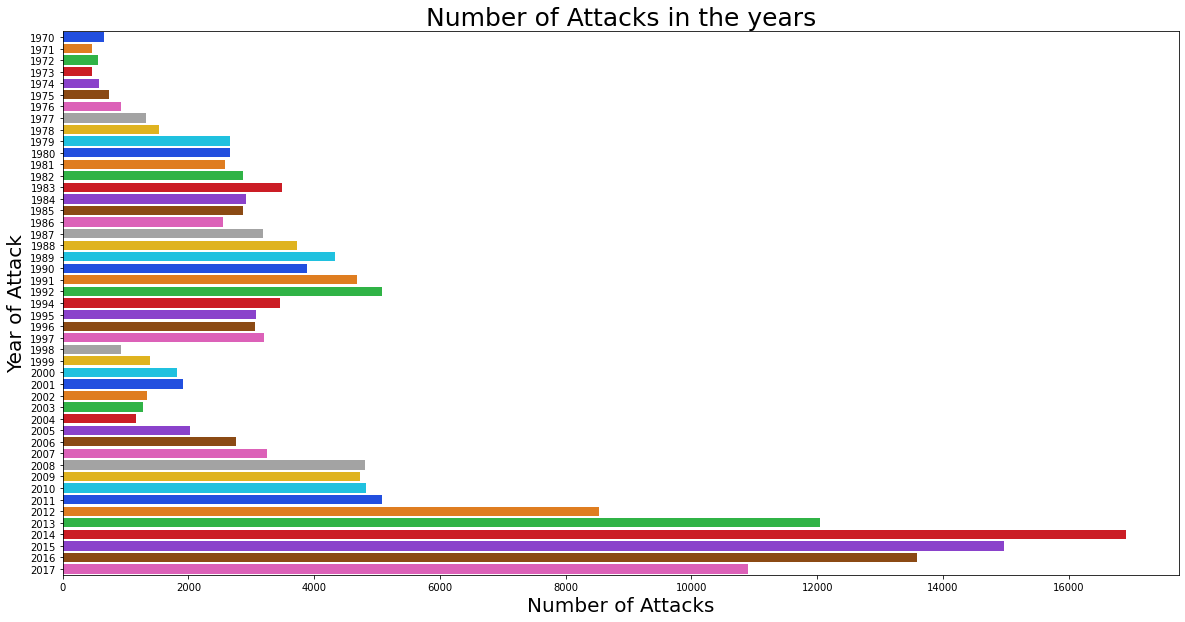

In [ ]:
year = data_frame['Year'].unique()
years_count = data_frame['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (20,10))
sns.barplot(y = year,
           x = years_count,
           palette = "bright",
           orient="h")
plt.xticks(rotation = 0)
plt.xlabel('Number of Attacks',fontsize=20)
plt.ylabel('Year of Attack',fontsize=20)
plt.title('Number of Attacks in the years',fontsize=25)
plt.show()

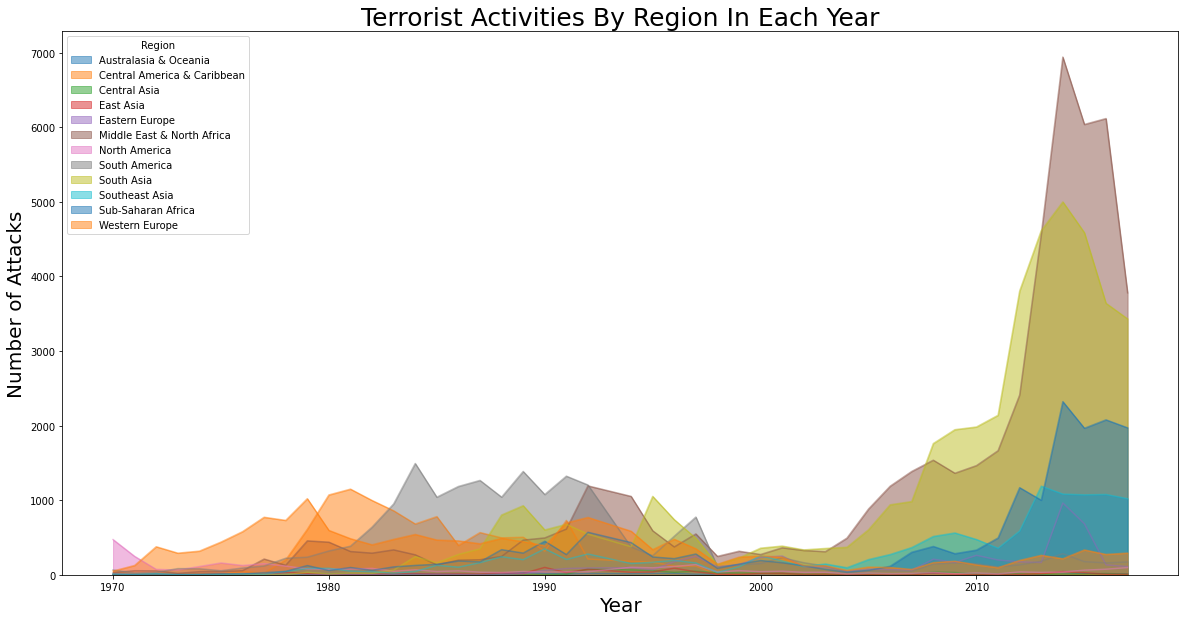

In [ ]:
pd.crosstab(data_frame.Year, data_frame.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [ ]:
attack = data_frame.Country.value_counts()[:20]
attack
#to obtain 20 countries affected

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

In [ ]:
data_frame.Group.value_counts()[1:20]
#to obtain top 20 attacking groups

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


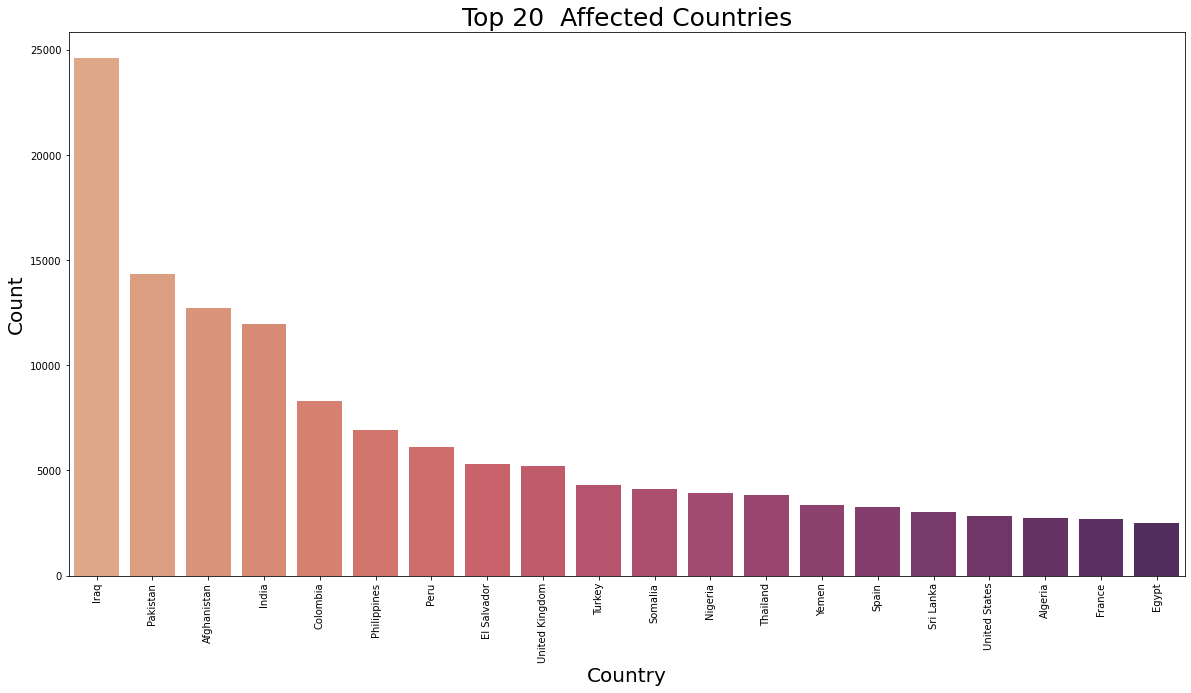

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(data_frame['Country'].value_counts()[:20].index,data_frame['Country'].value_counts()[:20].values,palette="flare")
plt.title('Top 20  Affected Countries',fontsize=25)
plt.xlabel('Country',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation = 90)
plt.show()

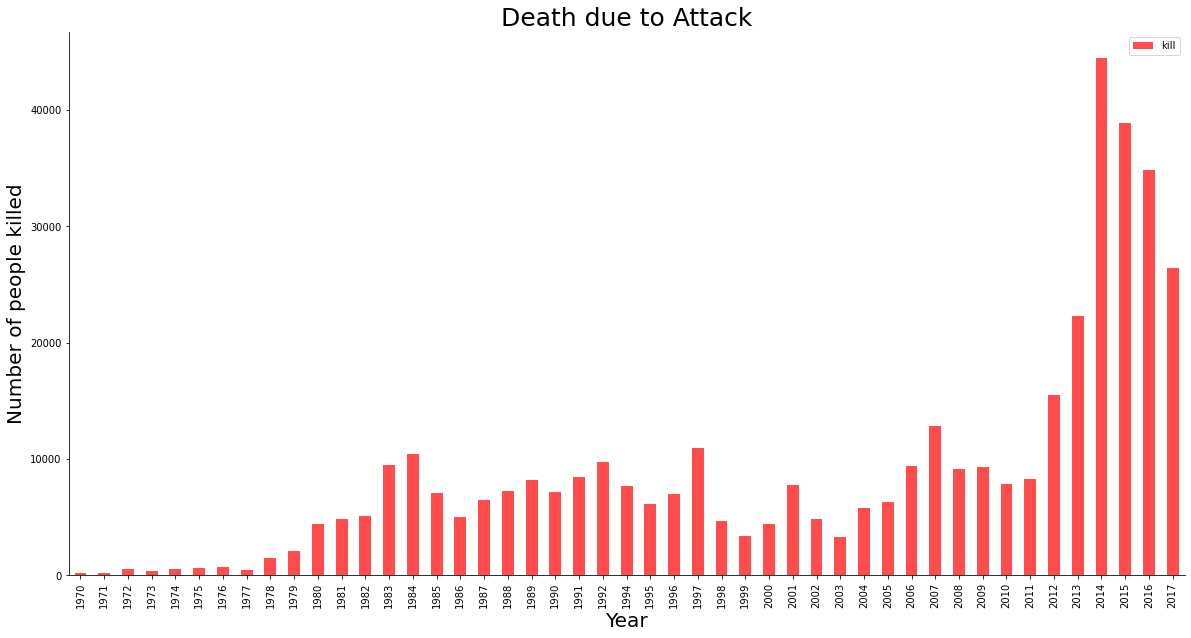

In [ ]:
df = data_frame[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4,color='red')
plt.xticks(rotation = 90)
plt.title("Death due to Attack",fontsize=25)
plt.ylabel("Number of people killed",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

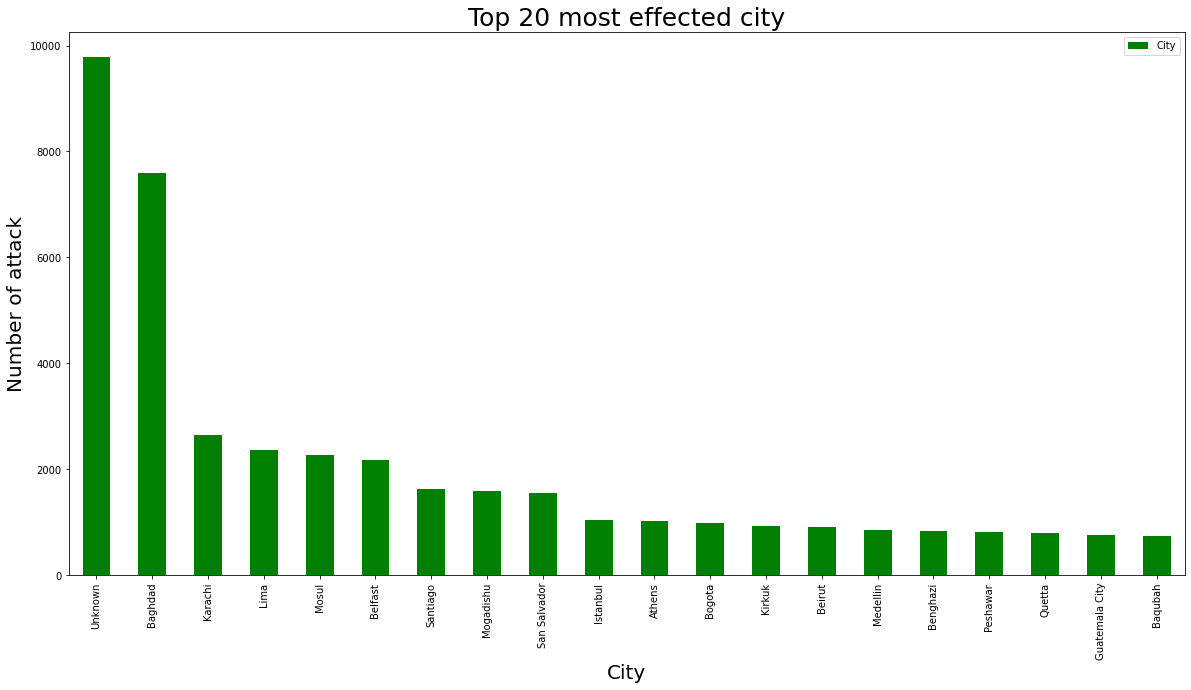

In [ ]:
data_frame['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(20).plot(kind='bar',figsize=(20,10),color='green')
plt.xticks(rotation = 90)
plt.xlabel("City",fontsize=20)
plt.ylabel("Number of attack",fontsize=20)
plt.title("Top 20 most effected city",fontsize=25)
plt.show()

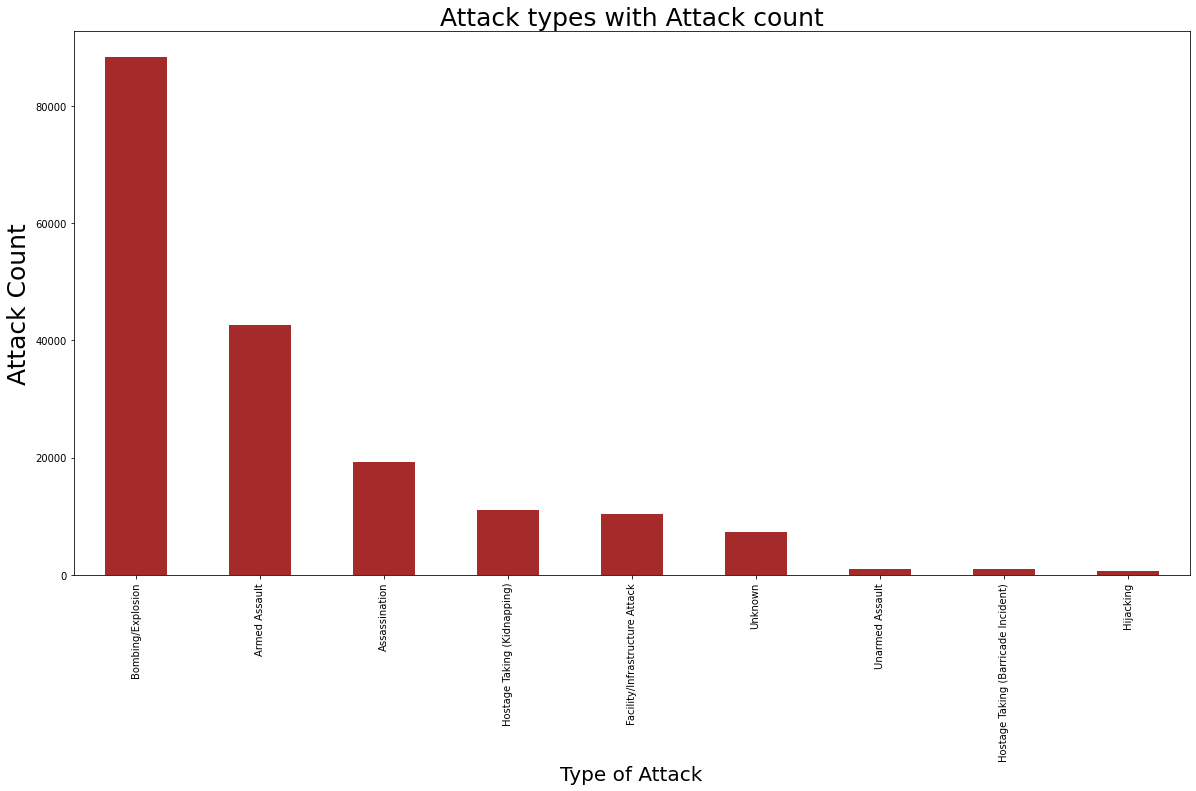

In [ ]:
data_frame['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='brown')
plt.xticks(rotation = 90)
plt.xlabel("Type of Attack",fontsize=20)
plt.ylabel("Attack Count",fontsize=25)
plt.title("Attack types with Attack count",fontsize=25)
plt.show()

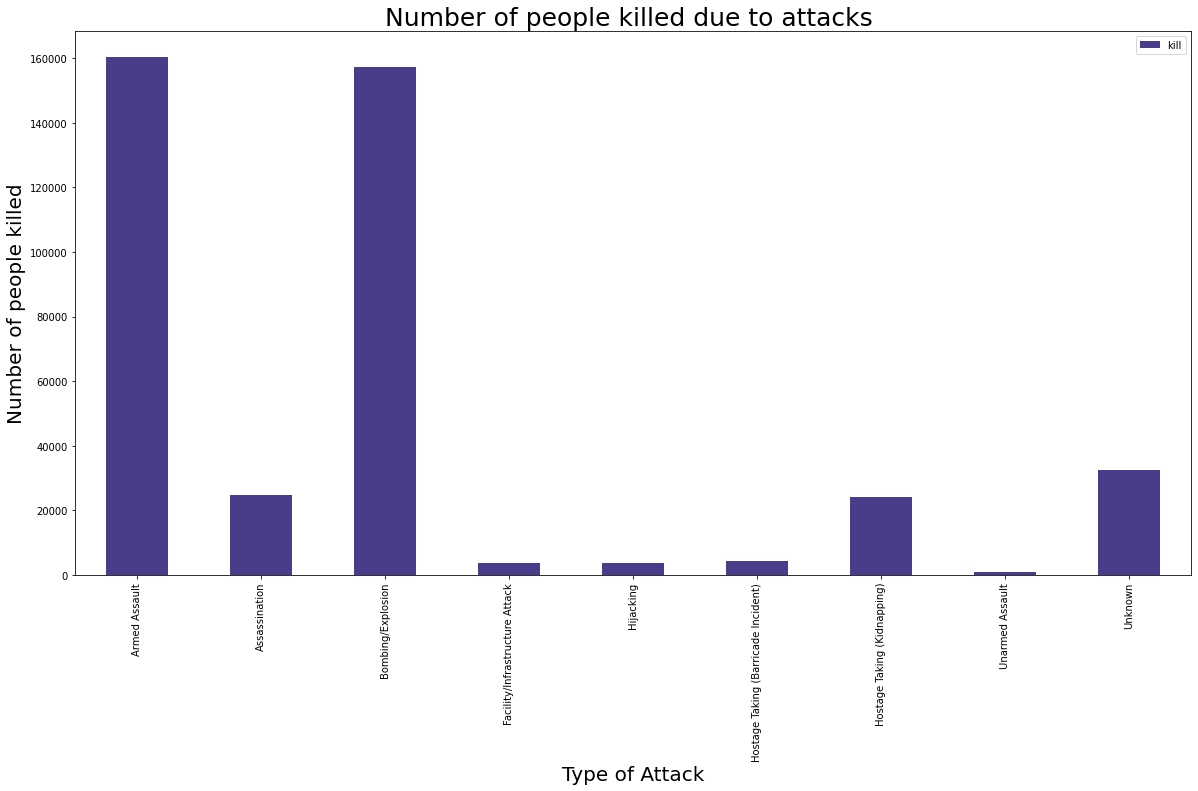

In [ ]:
data_frame[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])
plt.xticks(rotation=90)
plt.title("Number of people killed due to attacks ",fontsize=25)
plt.ylabel('Number of people killed',fontsize=20)
plt.xlabel('Type of Attack',fontsize=20)
plt.show()

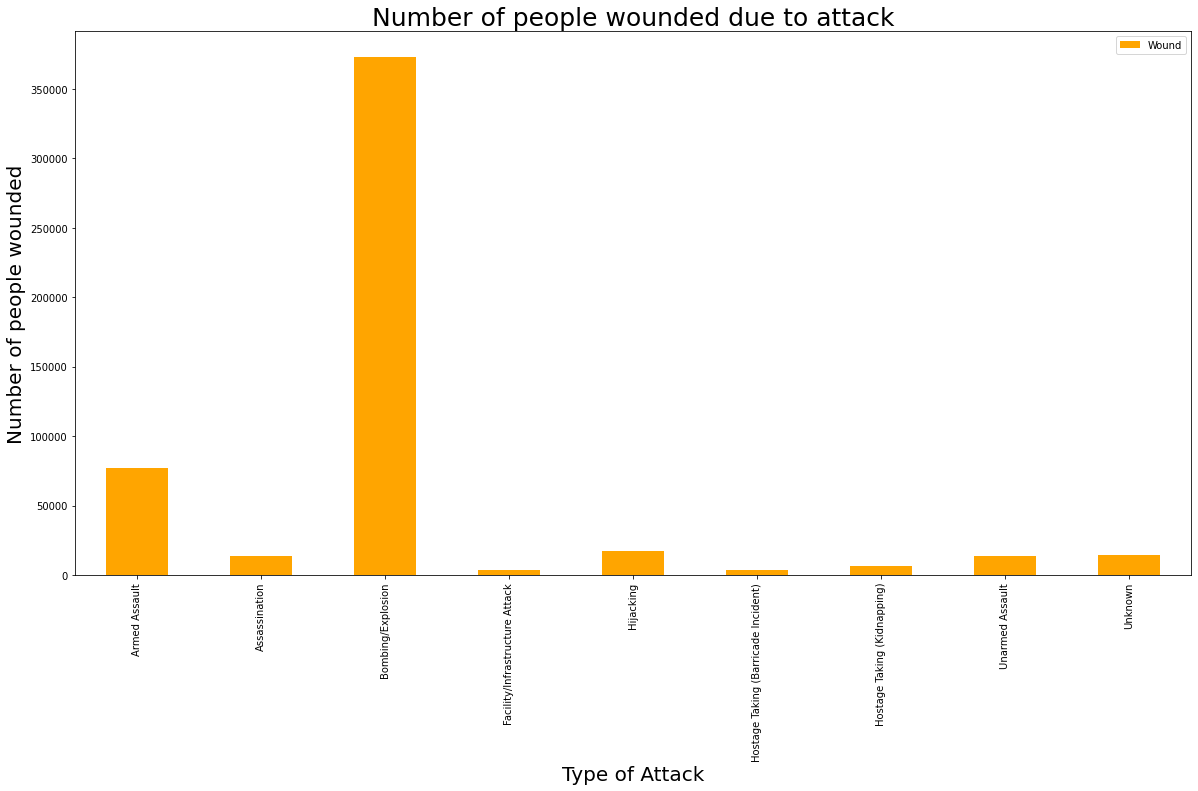

In [ ]:
data_frame[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['orange'])
plt.xticks(rotation=90)
plt.title("Number of people wounded due to attack",fontsize=25)
plt.ylabel('Number of people wounded',fontsize=20)
plt.xlabel('Type of Attack',fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


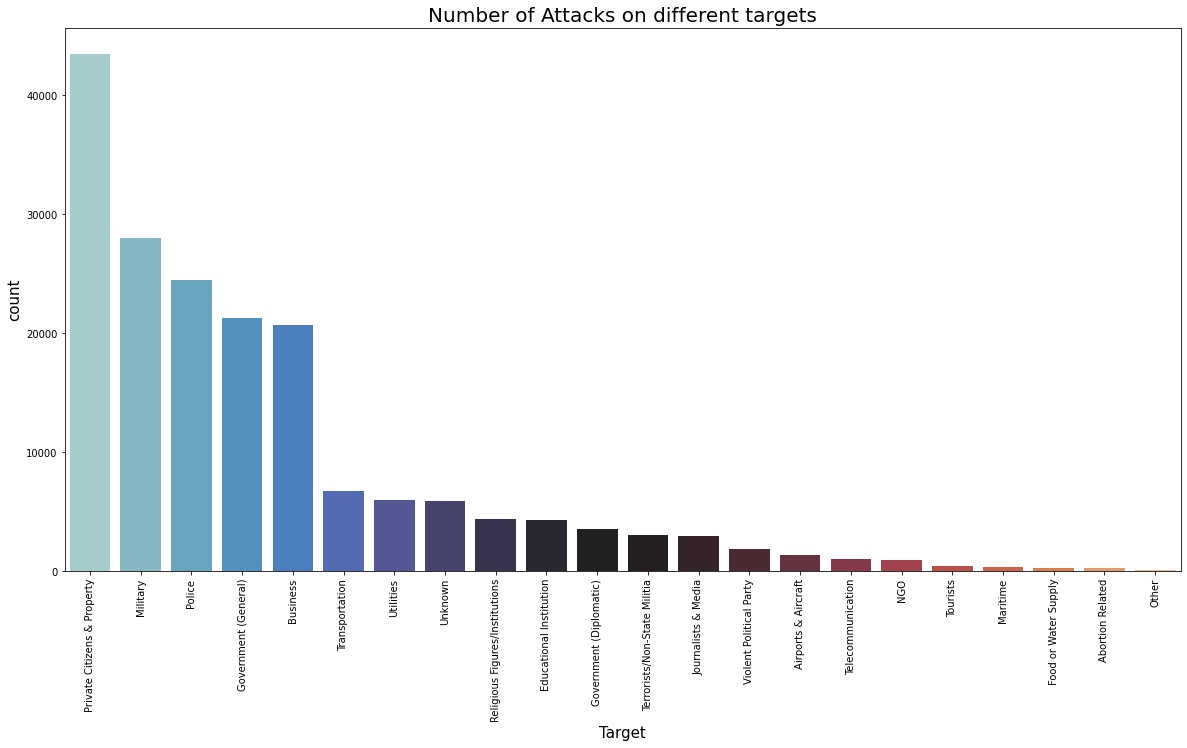

In [ ]:
plt.subplots(figsize=(20,10))
sns.countplot(data_frame["Targettype"],order=data_frame['Targettype'].value_counts().index,palette="icefire");
plt.xticks(rotation=90)
plt.xlabel("Target",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Number of Attacks on different targets",fontsize=20)
plt.show()

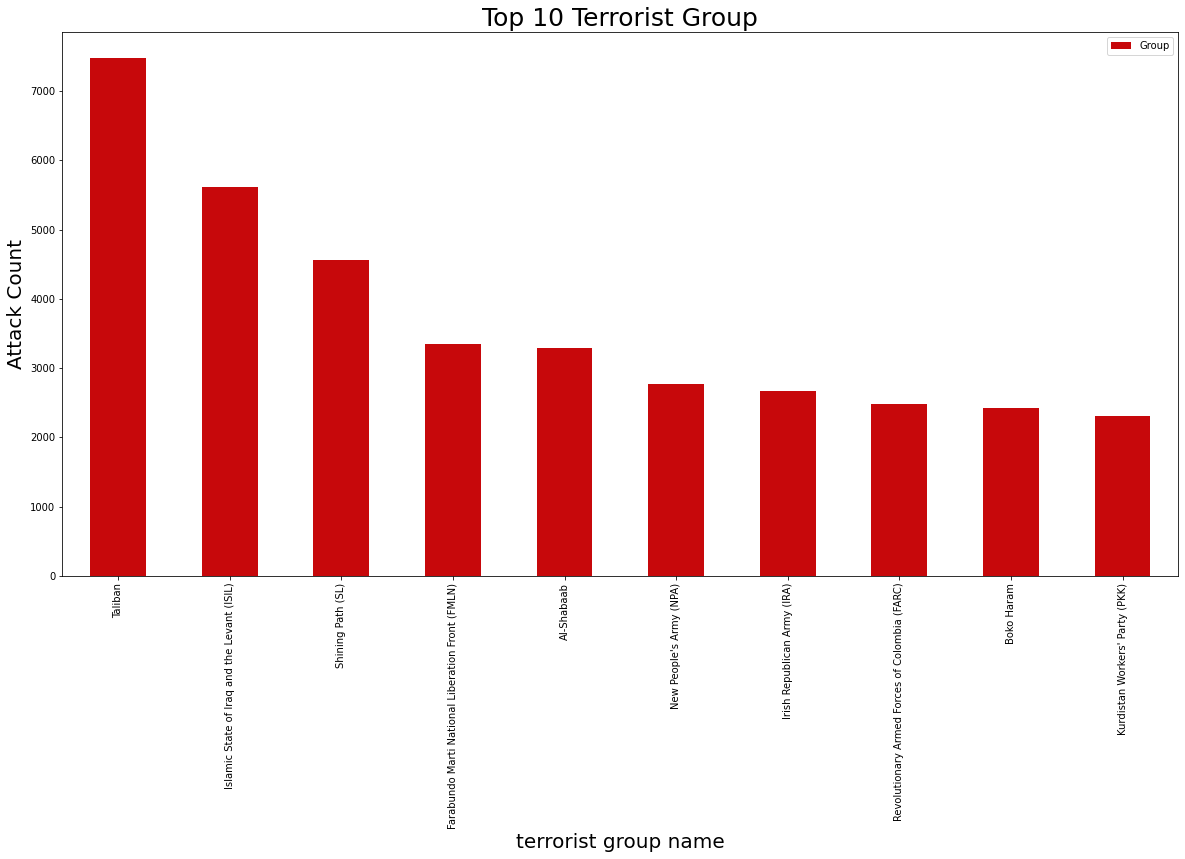

In [ ]:
data_frame['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='#c7080b',figsize=(20,10))
plt.title("Top 10 Terrorist Group",fontsize=25)
plt.xlabel("terrorist group name",fontsize=20)
plt.ylabel("Attack Count",fontsize=20)
plt.show()

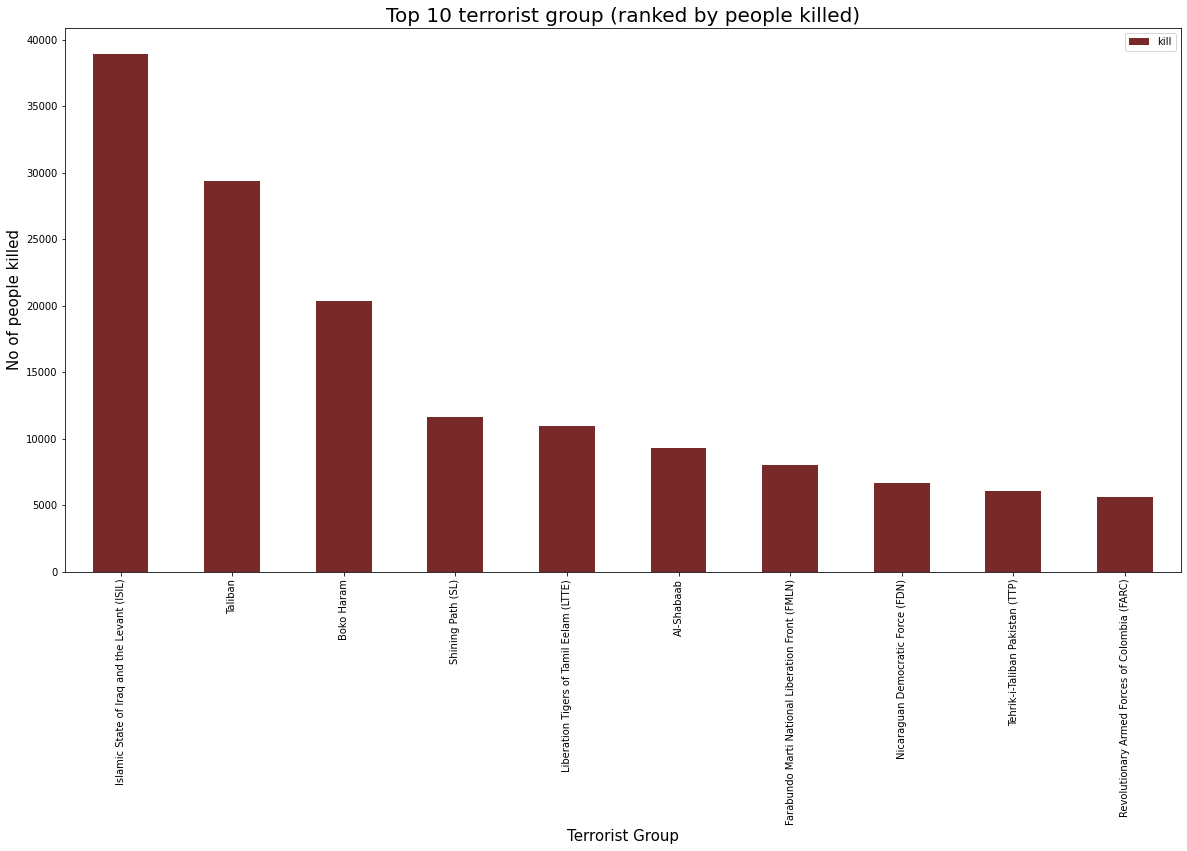

In [ ]:
data_frame[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='#78292a',figsize=(20,10))
plt.title("Top 10 terrorist group (ranked by people killed)",fontsize=20)
plt.xlabel("Terrorist Group",fontsize=15)
plt.ylabel("No of people killed",fontsize=15)
plt.show()

### **Conclusion and Results :**
---
- Country with the most attacks: **Iraq**

- City with the most attacks: **Baghdad**

- Region with the most attacks: **Middle East & North Africa**

- Year with the most attacks: **2014**

- Month with the most attacks: **5**

- Group with the most attacks: **Taliban**

- Most Attack Types: **Bombing/Explosion**
